### Importing necessary packages

In [19]:
import numpy as np
import cv2
import pickle
from mnist_data import MnistData
import matplotlib.pyplot as plt

### Importing the created mnist_data class and initializing the mnist class

In [20]:
import mnist_data
import numpy as np
import pickle
import cv2 

class Mnist():
    """ Creating <Mnist> class to load the MNIST dataset and predict the handwritten digits """
    def __init__(self):
        """ Initialize the class by loading the MNIST dataset and the model parameters """
        self.data = mnist_data.MnistData()
        self.params = {}


    def sigmoid(self, x):
        """ Sigmoid function as the activation function """
        return 1/(1 + np.exp(-x))


    def softmax(self, a):
        """ Softmax function as the output layer activation function """
        c = np.max(a)
        exp_a = np.exp(a - c)
        return exp_a/np.sum(exp_a)
    

    def load(self):
        """ Load the MNIST dataset """
        (x_train, y_train), (x_test, y_test) = self.data.load()
        return (x_train, y_train), (x_test, y_test)
    
    
    def init_network(self):
        """ Initialize the model parameters """
        with open('model/sample_weight.pkl', 'rb') as f:
            self.params = pickle.load(f)

    def load_handwritten_image(self, filename):
        """ Load a handwritten image and resize it to 28x28 """
        img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (28, 28))
        img = img.astype(np.float32) / 255.0
        img = img.flatten()  # Flatten the image to match MNIST data shape
        return img
    
    def predict_image(self, filename):
        """ Predict the handwritten digit in the image """
        x = self.load_handwritten_image(filename)
        y = self.predict(x)
        predicted_digit = np.argmax(y)  # Get the digit with the highest probability
        return predicted_digit

    def predict(self, x):
        """ Predict the handwritten digit """
        w1, w2, w3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        a1 = np.dot(x, w1) + b1
        z1 = self.sigmoid(a1)

        a2 = np.dot(z1, w2) + b2
        z2 = self.sigmoid(a2)

        a3 = np.dot(z2, w3) + b3
        y = self.softmax(a3)

        return y    

### Creating the object for Mnist class and testing the sigmoid function

In [21]:
mnist = Mnist()
sample_input = np.array([1.0, -1.0, 0.0])
print("Sigmoid output:", mnist.sigmoid(sample_input))

File: train-images-idx3-ubyte.gz already exists.
File: train-labels-idx1-ubyte.gz already exists.
File: t10k-images-idx3-ubyte.gz already exists.
File: t10k-labels-idx1-ubyte.gz already exists.
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Sigmoid output: [0.73105858 0.26894142 0.5       ]


### Testing the softma function

In [22]:
sample_input = np.array([0.3, 2.9, 4.0])
print("Softmax output:", mnist.softmax(sample_input))

Softmax output: [0.01821127 0.24519181 0.73659691]


### Initializing the network

In [23]:
mnist.init_network()
print("Model parameters loaded:", "W1" in mnist.params, "W2" in mnist.params, "W3" in mnist.params)

Model parameters loaded: True True True


### Checking the load_handwritten_images function

Loaded image shape: (784,)


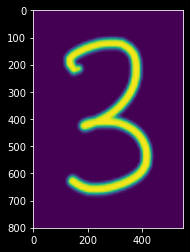

In [24]:
image = mnist.load_handwritten_image("3_0.png")
img = cv2.imread("3_0.png", cv2.IMREAD_GRAYSCALE)
print("Loaded image shape:", image.shape)
plt.imshow(img)  # Show first 10 values

### Predicting the image

In [27]:
sample_input = "0_0.png"  # Use the first test image
output_probs = mnist.predict_image(sample_input)
print("Predicted digit:", np.argmax(output_probs))

Predicted digit: 0


### Checking for all the handwritten images

In [26]:
import os

# Directory with images 
image_dir = "./"

# Loop to test each handwritten digit image
for digit in range(10):
    for index in range(5):  # since there are five images per digit
        filename = f"{digit}_{index}.png"
        filepath = os.path.join(image_dir, filename)
        if os.path.exists(filepath):
            print(f"Testing {filename}...")
            # Running the Python script with image filename and correct digit as arguments
            !python module5-3.py {filename} {digit}
        else:
            print(f"{filename} not found.")

Testing 0_0.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image 0_0.png is for digit 0 and recognized as 0.
Testing 0_1.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image 0_1.png is for digit 0 and recognized as 0.
Testing 0_2.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Fail: Image 0_2.png is for digit 0 but the original result is 3.
Testing 0_3.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image 0_3.png is for digit 0 and recognized as 0.
Testing 0_4.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image 0_4.png is for digit 0 and recognized as 0.
Testing 1_0.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done.
Figure(640x480)
Success: Image 1_0.png is for digit 1 and recognized as 1.
Testing 1_1.png...
Pickle: dataset/mnist.pkl already exists.
Loading...
Done